# <center><font color=slate>Inheritance and subtype polymorphism</font></center>
## <center>single <font color=tomato>inheritance</font><br>`class SubClass(BaseClass)`</center>
SubClass will have all of the methods of BaseClass, and SubClass will be able to override these methods if it needs to.

Subclasses should <font color=mediumTurquoise>initialize</font> base classes

Base class initializer will <font color=mediumTurquoise>only</font> be called automatically if subclass initializer is <font color=mediumTurquoise>undefined</font>

In [2]:
class Base:
    def __init__(self):
        print('Base initializer')

    def f(self):
        print('Base.f()')

If we create an instance of Base, we see, of course, that its initializer is called

In [3]:
b = Base()

Base initializer


And calling the f method on that instance uses Base.f

In [4]:
b.f()

Base.f()


Now we define a subclass of Base called Sub, this subclass doesn't add any functionality to Base at all

In [5]:
class Sub(Base):
    pass


it inherits Base's initializer. And likewise, Sub also inherits Base.f

In [6]:
s = Sub()

Base initializer


In [7]:
s.f()

Base.f()


Sub can override Base.f by simply redefining the method itself.

In [8]:
class Sub(Base):
    def f(self):
        print('Sub.f()')

s = Sub()

Base initializer


In [9]:
s.f()

Sub.f()


Now we create a Sub initializer and then an instance:


In [10]:
class Sub(Base):
    def __init__(self):
        print("Sub initializer")

    def f(self):
        print('Sub.f()')

s = Sub()

Sub initializer


In [11]:
s.f()


Sub.f()


-   Base class `__init__()` is not called if overridden
-   Use `super()` to call base class `__init__()`

In [12]:
class Sub(Base):
    def __init__(self):
        super().__init__()
        print("Sub initializer")

    def f(self):
        print('Sub.f()')

s = Sub()

Base initializer
Sub initializer


In [13]:
s.f()

Sub.f()


## <center>A realistic example: <font color=tomato>SortedList</font></center>
SimpleList uses a standard list internally, and it provides a limited API for interacting with the list's data.

In [2]:
class SimpleList:
    def __init__(self, items):
        self._items = list(items)
    
    def add(self, item):
        self._items.append(item)
        
    def __getitem__(self, index):
        return self._items[index]

    def sort(self):
        self._items.sort()
    
    def __len__(self):
        return len(self._items)

    def __repr__(self):
        return "Simplelist({!r})".format(self._items)

<function __main__.SimpleList.__repr__(self)>

Now we create SortedList, a subclass of SimpleList, which keeps the list contents sorted.

In [7]:
class SortedList(SimpleList):
    def __init__(self, items=()):
        super().__init__(items)
        self.sort()

    def add(self, item):
        super().add(item)
        self.sort()

    def __repr__(self):
        return "Sortedlist({!r})".format(list(self))

sl = SortedList([4, 3, 78, 11])
sl, len(sl)

'Sortedlist([3, 4, 11, 78])'

In [16]:
sl.add(-42)
sl

Sortedlist([-42, 3, 4, 11, 78])

In [17]:
sl.add(7)

## <center>Multiple <font color=tomato>inheritance</font></center>
## <center>`isinstance()`</center>
Determines is an object is of a specified type

In [18]:
isinstance(3, int),isinstance('Hello', str), isinstance(4.456, bytes)

(True, True, False)

In [19]:
isinstance(sl, SortedList)

True

`isinstance()`will also return true if the object is a subclass of the second argument

In [20]:
isinstance(sl, SimpleList)

True

Returns `true` if first argument is an instance of any of the types in the tuple

In [21]:
x = []
isinstance(x, (float, dict, list))

True

In [22]:
class IntList(SimpleList):
    def __init__(self, items=()):
        for x in items: self._validate(x)
        super().__init__(items)

    @staticmethod
    def _validate(x):
        if not isinstance(x, int):
            raise TypeError('InLIst only supports integer values.')

    def add(self, item):
        self._validate(item)
        super().add(item)

    def __repr__(self):
        return "InList({!r})".format(list(self))

il = IntList([4,3,2,1])
il

InList([4, 3, 2, 1])

In [23]:
il.add(6)
il

InList([4, 3, 2, 1, 6])

In [24]:
try:
    il.add('10')
except Exception as e:
    print(e.__repr__())

TypeError('InLIst only supports integer values.')


## <center>`issubclass()`</center>
Determines if one type is a subclass of another

In [25]:
issubclass(IntList, SimpleList), issubclass(SortedList, SimpleList)

(True, True)

In [26]:
issubclass(SortedList, IntList)

False

In [27]:
class MyInt(int):   pass
class MySpecialInt(MyInt):  pass
issubclass(MySpecialInt, int)

True

## <center>multiple <font color=tomato>inheritance</font><br>`class SubClass(BaseClass1, BaseClass2,...)`</center>

Defining a class with more than one base class
-   Subclasses <font color=mediumTurquoise>inherit</font> methods of all bases
-   Without conflict, names <font color=mediumTurquoise>resolve </font>in the obvious way
-   <font color=mediumTurquoise>Method Resolution Order (MRO)</font> determines name lookup in all classes


In [28]:
class SortedIntList(IntList, SortedList):
    def __repr__(self):
        return 'SortedIntList ({!r})'.format(list(self))

sil = SortedIntList([42, 1, -4])
sil

SortedIntList ([-4, 1, 42])

In [29]:
sil.add(200)
sil

SortedIntList ([-4, 1, 42, 200])

In [30]:
try:
    sil.add('4')
except Exception as e:
    print(e.__repr__())

TypeError('InLIst only supports integer values.')


if a class:
-   has <font color=mediumTurquoise>multiple</font> base classes
-   defines <font color=mediumTurquoise>no initializers</font>

Then <font color=mediumTurquoise>only</font> the initializer of the <font color=mediumTurquoise>first</font> base class is automatically called

`__bases__`<font color=mediumTurquoise>a tuple of base classes</font>

In [31]:
SortedIntList.__bases__

(__main__.IntList, __main__.SortedList)

### <font color=lightGreen>Method Resolution Order (MRO)</font>
Ordering that determines method name lookup
-   Methods may be defined in multiple places
-   MRO is an ordering of inheritance graph

## <center>`__mro__`</center>
-   The method resolution order for a class is stored on a special member called `__mro__`.
-   The `__mro__` attribute is a tuple of classes defining the method resolution order
-   The method `mro()` on a class get the same information in a list rather than as a tuple


In [32]:
SortedIntList.__mro__

(__main__.SortedIntList,
 __main__.IntList,
 __main__.SortedList,
 __main__.SimpleList,
 object)

In [33]:
SortedIntList.mro()

[__main__.SortedIntList,
 __main__.IntList,
 __main__.SortedList,
 __main__.SimpleList,
 object]

How <font color=mediumTurquoise>MRO</font> works?

when a method on an object is called in Python:
1.  Python looks at the MRO for that object's type.
2.  For each entry in the MRO, starting at the front and working in order to the back
3.  Python checks if that class has the requested method.
4.  As soon as Python finds a class with a matching method, it uses that method,
5.  Search stops

In [34]:
class A:
    def func(self):
        return 'A.func()'

class B(A):
    def func(self):
        return 'B.func()'

class C(A):
    def func(self):
        return 'C.func()'

class D(B, C):
        pass
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [35]:
d = D()
d.func()

'B.func()'

In [36]:
class D(C, B):
        pass
D.mro()

[__main__.D, __main__.C, __main__.B, __main__.A, object]

In [37]:
d = D()
d.func()

'C.func()'

### <font color=lightGreen>C3</font>
algorithm for calculating MRO in Python
-   Subclasses come <font color=mediumTurquoise>before</font> base classes
-   Base class order from class definition is <font color=mediumTurquoise>preserved</font>
-   First two qualities are preserved <font color=mediumTurquoise>no matter</font> where you Start in the inheritance graph
-   Some base class declarations will <font color=mediumTurquoise>violate</font> C3, and Python will <font color=mediumTurquoise>refuse</font> to compile

In [38]:
class A: pass
class B(A): pass
class C(A): pass
try:
    class D(B, A, C): pass
except Exception as e:
    print(e.__repr__())

TypeError('Cannot create a consistent method resolution\norder (MRO) for bases A, C')


-   Here since B and C both inherit from A, B and C must both come before A in any MRO.
-   This follows from one of the qualities that C3 preserves.
-   However, since D's base class declaration puts A before C, and since C3 also guarantees that base class declaration order is preserved, C3 cannot produce a consistent MRO.
-   That is, it can't put A both before and after C

***
## <center>The<font color=tomato> Built-in</font>`super()`function</center>

`super()` doesn't work with the base classes of a class, but instead it works with the <font color=mediumTurquoise>MRO</font> of the type of the object on which a method was originally invoked.

-   `super()`returns a <font color=mediumTurquoise>proxy</font> object which <font color=mediumTurquoise>routes</font> method calls.
    -   <font color=mediumTurquoise>Bound proxy</font> bound to specific class or instance
    -   <font color=mediumTurquoise>Unbound proxy</font> not bound to a class or instance

There are <font color=mediumTurquoise>two</font> types of bound proxies:
-   <font color=mediumTurquoise>instance</font>-bound
-   <font color=mediumTurquoise>class</font>-bound

### <font color=lightGreen>Class-bound</font> proxy
## <center>`super(base-class, derived class)`</center>
`base-class`is a class object

`derived-class` subclass of first argument

When a method on the proxy is evoked, here's what happens
1.  Python finds the <font color=mediumTurquoise>MRO</font> for`derived-class`
2.  it then finds`base-class`in that <font color=mediumTurquoise>MRO</font>.
3.  it takes everything <font color=mediumTurquoise>after</font>`base-class`in the <font color=mediumTurquoise>MRO</font> and finds the first class in that sequence with a method name matching the request

In [39]:
super(SortedList, SortedIntList)

<super: __main__.SortedList, __main__.SortedIntList>

Applying the above algorithm, Python first finds the MRO for the second argument,
for the `SortedIntList()` is as follows:

In [40]:
SortedIntList.mro()

[__main__.SortedIntList,
 __main__.IntList,
 __main__.SortedList,
 __main__.SimpleList,
 object]

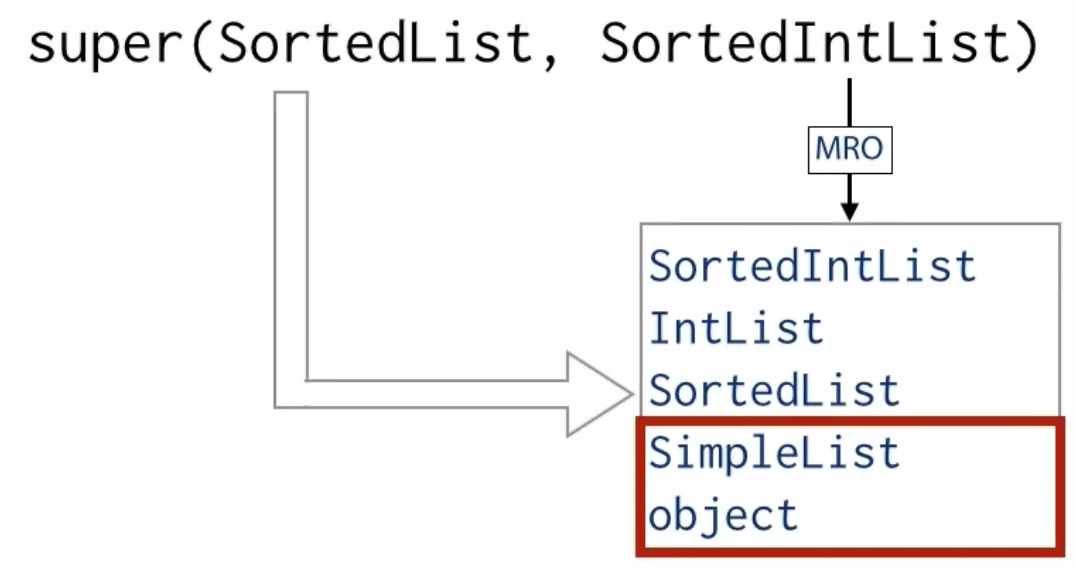

In [41]:
from IPython.core.display import Image, display
display(Image('img/image2.png'))


then finds SortedList in that MRO and takes everything after `SortedList`,
giving an MRO containing just `SimpleList` and `object`.
It then finds the first class in that MRO with an add method, which, is `SimpleList`

In [42]:
super(SortedList, SortedIntList).add

<function __main__.SimpleList.add(self, item)>

Our proxy is bound to a class, not an instance, so we can't invoke it:

In [43]:
try:
    super(SortedList, SortedIntList).add(4)
except Exception as e:
    print(e.__repr__())


TypeError("add() missing 1 required positional argument: 'item'")


If we use the proxy to look up a static method or class method, we could invoke it directly

In [44]:
super(SortedIntList, SortedIntList)._validate(5)

In [45]:
super(SortedIntList, SortedIntList)._validate(10)

In [46]:
try:
    super(SortedIntList, SortedIntList)._validate('1')
except Exception as e:
    print(e.__repr__())

TypeError('InLIst only supports integer values.')


ython will raise an exception if the second argument is not a subclass of the first

In [47]:
try:
    super(int, IntList)
except Exception as e:
    print(e.__repr__())

TypeError('super(type, obj): obj must be an instance or subtype of type')


### <font color=lightGreen>Instance-bound</font> proxy
Instance bound super proxies work very much like class bound proxies.
But instead of binding to a class object, they bind to an instance
## <center>`super(class, instance-of-class)`</center>

-   `class`is a class object
-   `instance-of-class` instance of first argument

The behavior of the super proxy in this case is like this:
1.  Python finds the <font color=mediumTurquoise>MRO</font> for the type of the second argument
2.  Python finds the location of the first argument to`super()`in that <font color=mediumTurquoise>MRO</font>.
The instance must be derived from the class, so the class must be in the MRO.
3.  Python finally takes everything in the <font color=mediumTurquoise>MRO after</font> the class and uses that as the MRO for resolving methods

Applying the above algorithm

In [48]:
SortedIntList.mro()

[__main__.SortedIntList,
 __main__.IntList,
 __main__.SortedList,
 __main__.SimpleList,
 object]

In [57]:
sil = SortedList([5, 15, 10])
sil

Sortedlist([5, 10, 15])

In [50]:
super(SortedList, sil)

<super: __main__.SortedList, Sortedlist([5, 10, 15])>

The proxy is bound to a `SortedIntList` and will start method resolution from `SortedIntList`'s MRO at the point after `SortedList`.

The next entry in `SortedIntLists` MRO after `SortedList` is `SimpleList`.

So this super proxy will be directly using SimpleList methods, bypassing our constraint checks.

In [51]:
super(SortedList, sil).add(6)
sil

Sortedlist([5, 10, 15, 6])

In [52]:
super(SortedList, sil).add('not number')
sil

Sortedlist([5, 10, 15, 6, 'not numnber'])

Then`SortedIntList`not only isn't sorted anymore, but it also accepts str objects...

## <center>`super()` arguments</center>
### `super(base-class, derived-class)`<br>`super(class, instance-of-class)`
When calling `super()` in a method with no arguments Python sorts out the arguments.
### <font color=lightGreen>instance</font> method `- super(class of method, self)`
In an instance method, that is a method which takes an instance as its first argument, calling `super()` without arguments, is the same as calling `super()` with the `methods class` as the <font color=mediumTurquoise>first argument</font> and `self` as <font color=mediumTurquoise>the second</font>.
In the case of single inheritance then, this is equivalent to looking for a method on the base class.
### <font color=lightGreen>class</font> method `- super(class of method, class)`
Calling `super()` without arguments in a class method is equivalent to calling `super()` with the `methods class` as the <font color=mediumTurquoise>first argument</font> and the `class` argument, as <font color=mediumTurquoise>the second</font>.
In the typical case, this is equivalent to calling the base class's method.

`super()` uses <font color=mediumTurquoise>everything</font> after a specific class in an MRO to <font color=mediumTurquoise>resolve</font> method calls

## <center>`object`<br>the core of the Python<font color=tomato> object model</font></center>

In [53]:
SortedList.mro()

[__main__.SortedList, __main__.SimpleList, object]

In [54]:
IntList.mro()[-1], SortedList.mro()[-1], int.mro()[-1], list.mro()[-1]

(object, object, object, object)

`object`is the <font color=mediumTurquoise>ultimate</font> base class of every class

`object`is <font color=mediumTurquoise>automatically</font> added as base class

`object` is part of <font color=mediumTurquoise>every class</font> in Python

In [55]:
class NoBaseClass: pass
NoBaseClass.__bases__

(object,)

In [56]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']